# **Titanic Kaggle Challenge**

## Step1: Importing libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step2: Exploratory Data Analysis

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
data['Ticket'].nunique()

681

### Starting Observations:
   - There are a mix of numerical and categorical values in the dataset. Need to convert the categorical into numerical
   - **PassengerId** and **Name** column does not provide any useful information w.r.t survival rate and thus needs to be dropped
   - **Age**, **Cabin**, **Embarked** columns have null values. Either fix the missing values or drop the columns based on their relevance of impacting the passenger survival rate.
   - **Ticket** column has 681 unique values and provides no useful information. Thus it also needs to be dropped.
   - Analysing survival based on other features required to understand the correlation between them and passenger survival.
   <br>

### Age

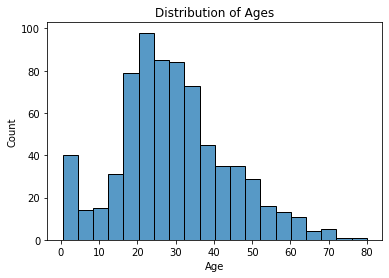

In [8]:
# Plotting distribution for Fare among passengers
Age_data = data['Age']
sns.histplot(data = Age_data)
plt.title('Distribution of Ages')
plt.show()

## Cabin

In [9]:
print('There were {} Cabins in Titanic that were allocated to passengers'.format(data['Cabin'].nunique()))

There were 147 Cabins in Titanic that were allocated to passengers


In [10]:
# Converting to numerical based on whether or not a passenger had an allocated Cabin

data['Cabin'] = data['Cabin'].apply(lambda x:0 if pd.isnull(x) else 1)

Out of 342 passengers survived, 136 were holding a Cabin and 206 were without a Cabin
Another perspective is that survival rate among cabin holders was 66.67% ,whereas only 29.99% in case of passengers without a cabin


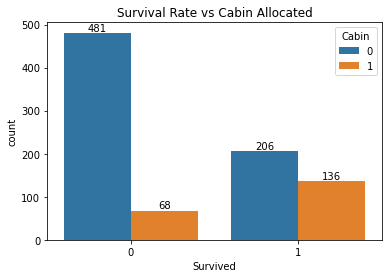

In [11]:
# Visualisation 

ax = sns.countplot(x='Survived', hue='Cabin', data=data)
ax.set(title='Survival Rate vs Cabin Allocated')
for container in ax.containers:
    ax.bar_label(container)
    

# Analysing Survival as compared to holding a cabin or not

cabin_passengers = len(data[data['Cabin'] == 1])
non_cabin_passengers = len(data) - cabin_passengers

cabin_passengers_survived = len(data[(data['Cabin'] == 1) & (data['Survived'] == 1)])
non_cabin_passengers_survived = len(data[(data['Cabin'] == 0) & (data['Survived'] == 1)])
survived_passengers = len(data[data['Survived'] == 1])

percent_cabin_passengers_survived = "{:.2f}".format(100 * (cabin_passengers_survived / cabin_passengers))
percent_non_cabin_passengers_survived = "{:.2f}".format(100 * (non_cabin_passengers_survived / non_cabin_passengers))


print('Out of {} passengers survived, {} were holding a Cabin and {} were without a Cabin'.format(survived_passengers,cabin_passengers_survived,
                                                                                                  non_cabin_passengers_survived))

print('Another perspective is that survival rate among cabin holders was {}% ,whereas only {}% in case of passengers without a cabin'.format(percent_cabin_passengers_survived,
                                                                                                            percent_non_cabin_passengers_survived))

<br>

### Port of Embarkation

In [12]:
print('There were {} ports of embarkation for the passengers'.format(data['Embarked'].nunique()))

There were 3 ports of embarkation for the passengers


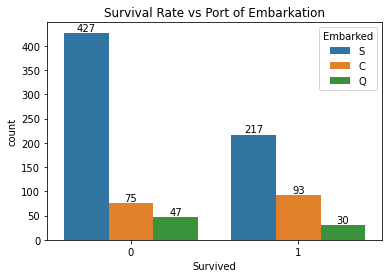

In [13]:
# Visualisation 

ax = sns.countplot(x='Survived', hue='Embarked', data=data)
ax.set(title='Survival Rate vs Port of Embarkation')
for container in ax.containers:
    ax.bar_label(container)

In [14]:
# Dropping 2 missing values
data['Embarked'].dropna(inplace=True)

# One Hot encoding
data['Embarked'] = data['Embarked'].map({'S':'Embarked_Southampton','C':'Emabrked_Cherbough','Q':'Embarked_Queenstown'})
embark_dummies = pd.get_dummies(data['Embarked'])
data = data.join(embark_dummies)
data.drop(labels='Embarked',axis=1,inplace=True)

In [15]:
data['Emabrked_Cherbough']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    0
Name: Emabrked_Cherbough, Length: 891, dtype: uint8

<br>

### Sex

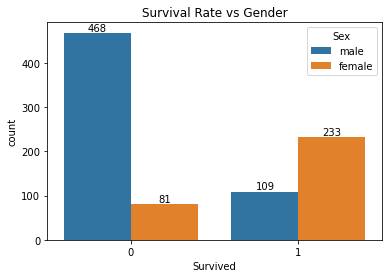

In [16]:
# Visualisation 

ax = sns.countplot(x='Survived', hue='Sex', data=data)
ax.set(title='Survival Rate vs Gender')
for container in ax.containers:
    ax.bar_label(container)

In [17]:
# One Hot encoding

gender_dummies = pd.get_dummies(data['Sex'])
data = data.join(gender_dummies)
data.drop(labels='Sex',axis=1,inplace=True)

<br>

### Ticket Class

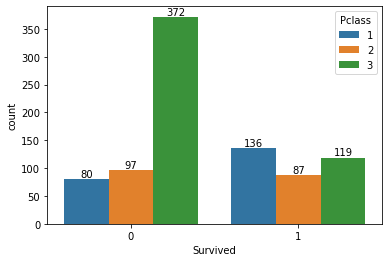

In [18]:
# Visualisation 

ax = sns.countplot(x='Survived', hue='Pclass', data=data)
for container in ax.containers:
    ax.bar_label(container)

### Sibsp

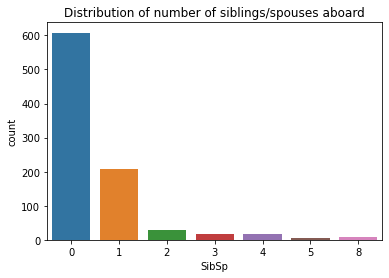

In [19]:
sns.countplot(x=data['SibSp'])
plt.title('Distribution of number of siblings/spouses aboard')
plt.show()

### Parch

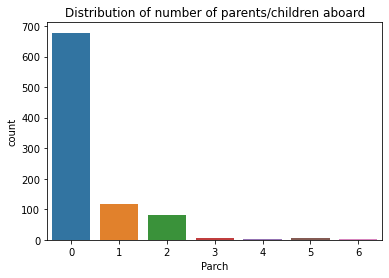

In [20]:
sns.countplot(x=data['Parch'])
plt.title('Distribution of number of parents/children aboard')
plt.show()

<br>

### Fare

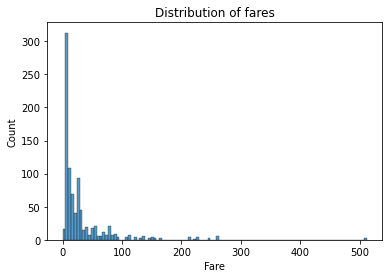

336 passengers payed less than 10 dollars for their ticket
502 passengers payed between 10 and 100 dollars for their ticket
53 passengers payed more than 50 dollars for their ticket


In [21]:
# Plotting distribution for Fare among passengers
Fare_data = data['Fare']
sns.histplot(data = Fare_data)
plt.title('Distribution of fares')
plt.show()

print('{} passengers payed less than 10 dollars for their ticket'.format(np.count_nonzero(Fare_data < 10)))
print('{} passengers payed between 10 and 100 dollars for their ticket'.format(np.count_nonzero((Fare_data >= 10) & (Fare_data <= 100))))
print('{} passengers payed more than 50 dollars for their ticket'.format(np.count_nonzero(Fare_data > 100)))

Text(0.5, 1.0, 'Heatmap for correlation between columns of training data')

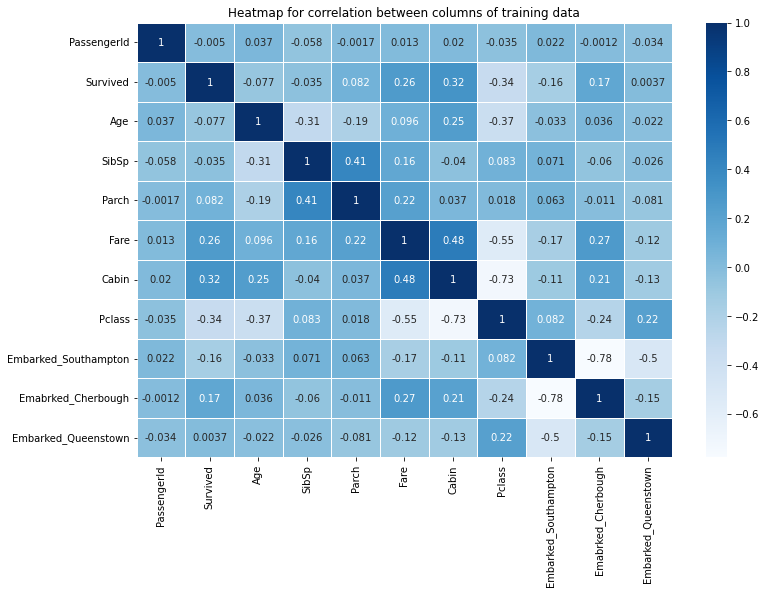

In [22]:
fig, ax = plt.subplots(figsize=(12,8)) 

sns.heatmap((data[[
            'PassengerId', 
            'Survived', 
            'Age',
            'SibSp',
            'Parch',
            'Fare',
            'Cabin',
            'Pclass',
            'Embarked_Southampton',
            'Emabrked_Cherbough',
            'Embarked_Queenstown',
            ]].corr()),
            linewidths=1,
            cmap=plt.cm.Blues, 
            annot=True,
            ax=ax)

plt.title('Heatmap for correlation between columns of training data')

## Step3: Feature Engineering

### Dropping Irrelevant Columns

In [23]:
data = data.drop(labels=['Name','PassengerId','Ticket'],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Emabrked_Cherbough,Embarked_Queenstown,Embarked_Southampton,female,male
0,0,3,22.0,1,0,7.2500,0,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,0,1,0,1


### Filling missing data for continuous data column

In [24]:
data['Age'] = data['Age'].fillna(value=data['Age'].median())

<br>

### One Hot Encoding for other categorical data columns

In [25]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Emabrked_Cherbough,Embarked_Queenstown,Embarked_Southampton,female,male
0,0,3,22.0,1,0,7.2500,0,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1,1,0
888,0,3,28.0,1,2,23.4500,0,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,1,0,0,0,1


<br>

## Step4: Splitting Data into Train & Test

In [26]:
X = data.drop('Survived',axis=1).values
y = data['Survived'].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10)

<br>

## Step5: Scaling Data 

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

MinMaxScaler()

In [32]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape

(801, 11)

In [34]:
X_test.shape

(90, 11)

<br>

## Step6: Creating Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [63]:
model = Sequential()

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

<br>

## Step7: Training Model

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [66]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(X_test, y_test), verbose=1,
          batch_size = 32,
          callbacks=[early_stop]
          )

Epoch 1/300
26/26 [==============================] - 1s 7ms/step - loss: 0.6506 - acc: 0.6330 - val_loss: 0.6393 - val_acc: 0.5556
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5889 - acc: 0.7066 - val_loss: 0.6026 - val_acc: 0.6556
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5277 - acc: 0.7466 - val_loss: 0.5606 - val_acc: 0.7889
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5047 - acc: 0.7703 - val_loss: 0.5352 - val_acc: 0.7667
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4912 - acc: 0.7815 - val_loss: 0.5177 - val_acc: 0.7556
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5107 - acc: 0.7653 - val_loss: 0.5094 - val_acc: 0.7667
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4899 - acc: 0.7853 - val_loss: 0.5030 - val_acc: 0.7667
Epoch 8/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4684 - a

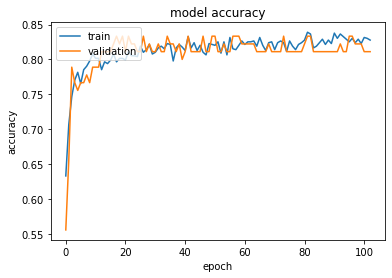

In [70]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

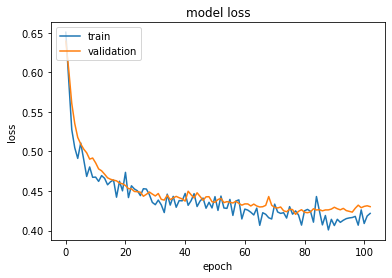

In [71]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [72]:
print('Max val_acc achieved: %.2f' %(max(model.history.history['val_acc'])*100), '%')
print('Max acc achieved: %.2f' %(max(model.history.history['acc'])*100), '%')

Max val_acc achieved: 83.33 %
Max acc achieved: 83.90 %


<br>

## Step8: Evaluating Model Performance

In [74]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3/3 [==============================] - 0s 2ms/step


In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        47
           1       0.88      0.70      0.78        43

    accuracy                           0.81        90
   macro avg       0.83      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



In [77]:
print(confusion_matrix(y_test,predictions))

[[43  4]
 [13 30]]


<br>

## Step9: Submission

In [79]:
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [87]:
test_data.shape

(418, 11)